# The Data Science Process

## Professional Ethics

Data Science and Machine Learning (and more broadly Computer Science) have great power. The techniques we will learn in this class are leading to algorithms giving computers the ability to make decisions based on a wealth of information. Facial recongition, credit and loan decisions, insurance pricing, are all examples of ways in which the tools we are learning in this class are being used.

It is not then surprising that with these tools comes some questions of professional ethics. Today we will discuss a few things to keep in mind. The first step in our Data Science process is to consider the ethical implications of the data collection and question we are setting out on.

#### Models Inherit Biases from the Data

If your model is built upon data from a system with biases (credit data for example), it is likely your model will inherit those biases. It is not enough to say that the process of building the model does not introduce bias, we also must be aware of whether the data we build that model from has biases. 

#### Keep in Mind the Consequences of Errors

As you build your model keep in mind the consequences of the errors in your model in the event it goes into production. These should guide you in the level of accuracy and the types and proportions of errors you can tolerate. An algorithm estimating the age of a tree from some features versus one being used to determine a likliehood that a prisoner will reoffend if paroled have much difference tolerances of error. 

#### Research on Human Subjects

There are restrictions on how data can be collected and used when the research is being conducted on human subjects. At federally funded institutions, proposals to do research on human subjects must be reviewed by institutional review boards. They are looking for among other things: How the privacy of subjects is being protected, how the risk of harm to subjects is being minimized, and how subjects are informed of their rights. Of particular importance is protecting vulnerable subjects (minors and prisoners for example).

This review must be done before data collection can be begin (typically).

There are similar reviews that must occur for Research on Animals.

#### Commitments Made about Data and Data Analysis

In obtaining permission from an Institutional Review Board, or permission from a company or individual owning data you wish to use, you or your company might make some promises about how that data will be used or how it will be protected. For example, in obtaining permission from Twitter to access their API you will be required to promise that you will not seek to obtain information about the political affiliation of an individual user, or that you will not publish content from Twitter without their permission. You need to honor promises that you or your employer have made regarding data and its protection. This is essential to ensuring trust in the profession, and to protecting vulnerable populations and individuals privacy, and it is essential to protecting yourself. 

#### Follow the Error Control Process

It is essential that when you finish the development of your model that you have as good an understanding of the accuracy of your model as you can. For example, the accuracy of your model, and the consequences for error may be one of the ethical issues you have dealt with. However even if your model is realtively innocous, you need to be able to understand its utility and pay off were it to be used in production. 

It is essnetial in your data science work that you follow a process that will result in an valid esitmate of the accuracy of your model. 

## Controlling for Error

### Error in Regression Problems

For today the gathering data process will be something we do here in Python by simmulating some data. Before we dive into an exploratory data analysis and developing a model, we should make a plan for how we will estimate the error of our model. Or even what we mean by the error of our model.

Today, because I want us to be sure we understand the sources of error in our analysis we will build the dataset in Python in a way where we actually know the *correct model*. You should be thinking about the House Pricing problem or one of the other regression problems we have talked about.

Suppose we have a predictor feature $x$ and a resulting value $y$ that have a linear relationship, however because we cannot possible account for all of the variation there is some *Irreducible Error*. That is when we build our sample, there is a random variable that comes along with it.


In [23]:
# Using the usual packages, plus scikitlearns LinearRegression tool; and numpy.random.

import pandas as pa
import numpy as np
import numpy.random as rn
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [18]:
# Building a sample with a linear relationship y = 10 x + 7 + E; where E is a random normally 
# distributed error term with mean 0 and variance 200.

x = 500*rn.random_sample(200)
y = 10*x + 7 + 200*rn.randn(200)

In [55]:
# Furthermore let's suppose there are a couple of data points that have a different E for
# some reason 

xa = np.array([700, 300])
ya = np.array([10*700 + 7 - 1500, 10*300 + 7 + 1500])

In [56]:
# Make a pandas.DataFrame of this data

dfx = pa.DataFrame(x, columns=['x'])
dfx['a'] = 0
dfx['y'] = y
dfx2 = pa.DataFrame(xa, columns=['x'])
dfx2['a'] = 1
dfx2['y'] = ya
df = dfx.append(dfx2, ignore_index=True)
df.tail()

,x,a,y
197,356.441502,0,3723.629007
198,32.456443,0,468.273163
199,127.950390,0,1248.396628
200,700.000000,1,5507.000000
201,300.000000,1,4507.000000


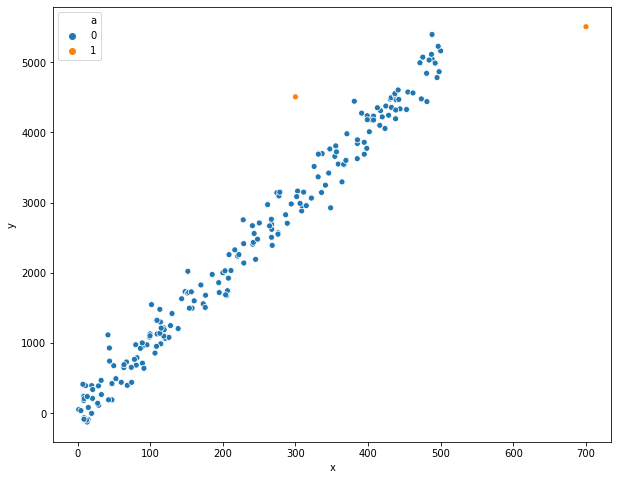

In [57]:
plt.figure(figsize=(10, 8))

sn.scatterplot(x='x', y='y', hue='a', data=df);

Note the presence of a relationship between predictor and result is readily apparent. The goal of regression is to estimate the true values of the slope and intercept of this relationship. So note that there will be two sources of error: 

- Reduccible Error: This is error that we can eliminate by using a better model for the relationship. It is due in this example to us using a sample.
- Irreduccible Error: This is the underlying error we introduced when we simulated the data. In real data it is due to factors not included in the model. This cannot be removed and our goal is instead to understand this term.

### Making a Test Set

